# Multiple wavelength synergie for hydrometeor classification
-------------------------------------------------------------------------------------------


In [2]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import wradlib
import satlib as sl
import wradlib as wrl
from osgeo import osr
import h5py
import glob
from pcc import get_my_cmap
from pcc import get_miub_cmap
from pcc import boxpol_pos
bonn_pos = boxpol_pos()
bx, by = bonn_pos['gkx_ppi'], bonn_pos['gky_ppi']
bonnlat, bonnlon = bonn_pos['lat_ppi'], bonn_pos['lon_ppi']
blat, blon = bonn_pos['lat_ppi'], bonn_pos['lon_ppi']


from pcc import plot_borders
from pcc import plot_radar

%matplotlib inline

/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationW

In [3]:
"""
Analyse of GPM DPR BB

"""


#dates ='20140729';pfnr=1
dates ='20150225';pfnr=0

#dates ='20151216'

#def gpm_bb(dates, pn=0):
zt=dates

pfad = ('/automount/ags/velibor/gpmdata/dpr/2A.GPM.DPR.V6-20160118.'+zt+'*.HDF5')
dpr_pfad = sorted(glob.glob(pfad))[pfnr]

print dpr_pfad

scan  = 'NS'#NS' #or MS

# Einlesen
dpr = h5py.File(dpr_pfad, 'r')
dpr_lat=np.array(dpr[scan]['Latitude'])
dpr_lon=np.array(dpr[scan]['Longitude'])
#dpr_pp=np.array(dpr[scan]['SLV']['zFactorCorrected'])
dpr_pp=np.array(dpr[scan]['PRE']['zFactorMeasured'])
dpr_pp[dpr_pp<0]= np.nan

dpr_pp_surf=np.array(dpr[scan]['SLV']['zFactorCorrectedNearSurface'])
dpr_pp_surf[dpr_pp_surf<0]= np.nan


dpr_bbh=np.array(dpr[scan]['CSF']['heightBB'], dtype=float)
dpr_bbh[dpr_bbh<0]= np.nan

dpr_bbh_flag = np.array(dpr[scan]['CSF']['flagBB'], dtype=float)
dpr_bbh_flag[dpr_bbh_flag<0]= np.nan

dpr_bbh_qual = np.array(dpr[scan]['CSF']['qualityBB'], dtype=float)
dpr_bbh_qual[dpr_bbh_qual<0]= np.nan


dpr_bbw=np.array(dpr[scan]['CSF']['widthBB'], dtype=float)
dpr_bbw[dpr_bbw<0]= np.nan

dpr_time = dpr['NS']['ScanTime']

proj_stereo = wrl.georef.create_osr("dwd-radolan")
proj_wgs = osr.SpatialReference()
proj_wgs.ImportFromEPSG(4326)

from pcc import boxpol_pos
bonn_pos = boxpol_pos()
bx, by = bonn_pos['gkx_ppi'], bonn_pos['gky_ppi']
bonnlat, bonnlon = bonn_pos['lat_ppi'], bonn_pos['lon_ppi']
blat, blon = bonn_pos['lat_ppi'], bonn_pos['lon_ppi']

dpr_lon, dpr_lat = wradlib.georef.reproject(dpr_lon, dpr_lat, projection_target=proj_stereo , projection_source=proj_wgs)
bonnlon, bonnlat = wradlib.georef.reproject(bonnlon, bonnlat, projection_target=proj_stereo , projection_source=proj_wgs)

print '-------->', bonnlon, bonnlat


lon0, lat0, radius = bonnlon, bonnlat, 100
r = np.sqrt((dpr_lat - lat0)**2 + (dpr_lon - lon0)**2)
position = r < radius

lat = dpr_lat[position]
lon = dpr_lon[position]

dpr_pp[np.where(r > radius)]=np.nan
pp=dpr_pp

dpr_pp_surf[np.where(r > radius)]=np.nan

dpr_bbw[np.where(r > radius)]=np.nan
dpr_bbh[np.where(r > radius)]=np.nan


# Zeitstempel erstellen
l2, l1 = -190, -250
k2, k1 = -4210, -4270
# BoxPol
#l2, l1 = -110, -320
#k2, k1 = -4130, -4340
#
pos = np.where((dpr_lat<k2) & (dpr_lat>k1) & (dpr_lon < l2) & (dpr_lon > l1))



h = np.arange(150,4800,150)
if scan=='HS':
    hdpr = 1000 * (np.arange(88,0,-1)*0.250)

else:
    hdpr = 1000 * (np.arange(176,0,-1)*0.125)

hhh = np.array(pp.shape[0]*pp.shape[1]*list(hdpr))
ppp = pp.reshape(pp.shape[0]*pp.shape[1]*pp.shape[2])

maske = ~np.isnan(hhh) & ~np.isnan(ppp)








/automount/ags/velibor/gpmdata/dpr/2A.GPM.DPR.V6-20160118.20150225-S153952-E171223.005648.V04A.HDF5
--------> -216.64772430049572 -4235.233235191105


pcc.py:372: DeprecatedWarning: open_shape is deprecated as of 0.11.1 and will be removed in 1.0.0. Use :func:`open_vector` instead.
  dataset, inLayer = wradlib.io.open_shape(filename)
pcc.py:475: DeprecatedWarning: polar2polyvert is deprecated as of 0.11.3 and will be removed in 1.0.0. Use :func:`spherical_to_polyvert` instead.
  (x_loc, y_loc))
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:673: DeprecatedWarning: polar2lonlat is deprecated as of 0.11.3 and will be removed in 1.0.0.
  lon, lat = polar2lonlat(r, az, sitecoords)
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:140: DeprecatedWarning: hor2aeq is deprecated as of 0.11.3 and will be removed in 1.0.0.
  delta, tau = hor2aeq(a, h, phi)


(7932, 49, 176)
(68405568,)


pcc.py:372: DeprecatedWarning: open_shape is deprecated as of 0.11.1 and will be removed in 1.0.0. Use :func:`open_vector` instead.
  dataset, inLayer = wradlib.io.open_shape(filename)
pcc.py:475: DeprecatedWarning: polar2polyvert is deprecated as of 0.11.3 and will be removed in 1.0.0. Use :func:`spherical_to_polyvert` instead.
  (x_loc, y_loc))
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:673: DeprecatedWarning: polar2lonlat is deprecated as of 0.11.3 and will be removed in 1.0.0.
  lon, lat = polar2lonlat(r, az, sitecoords)
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:140: DeprecatedWarning: hor2aeq is deprecated as of 0.11.3 and will be removed in 1.0.0.
  delta, tau = hor2aeq(a, h, phi)
pcc.py:372: DeprecatedWarning: open_shape is deprecated as of 0.11.1 and will be removed in 1.0.0. Use :func:`open_vector` instead.
  dataset, inLayer = wradlib.io.open_shape(filename)
pcc.py:475: DeprecatedWarn

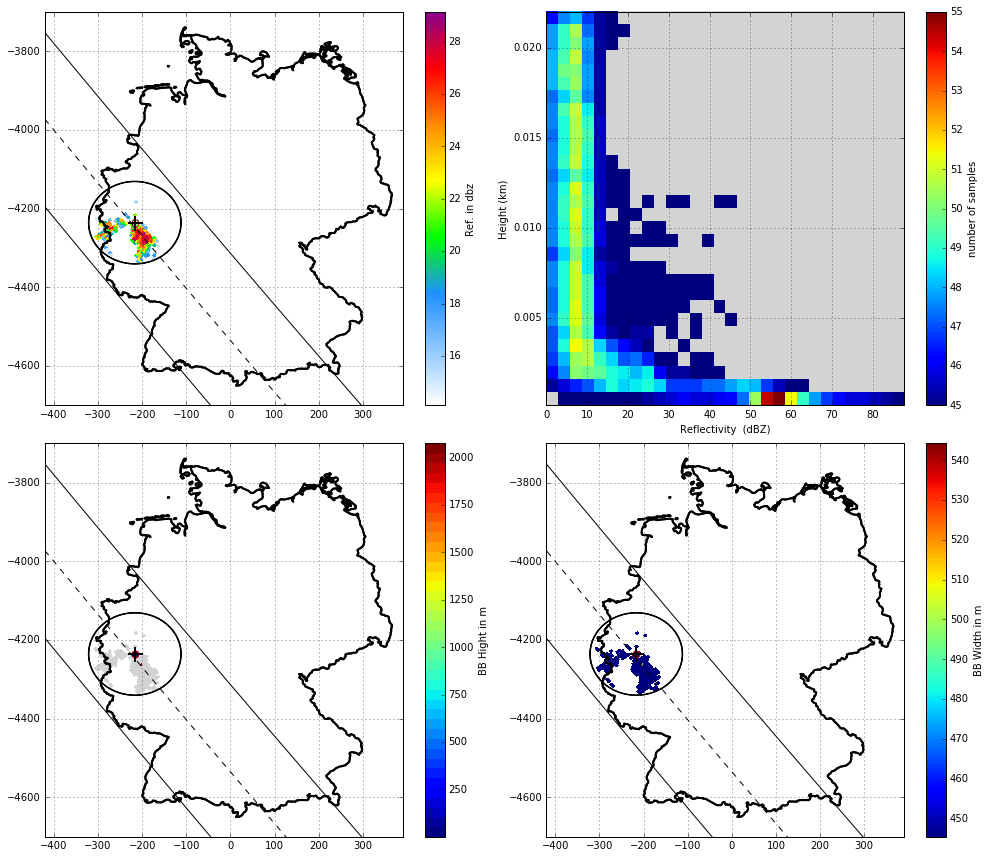

-----------BBH-----------


AttributeError: 'module' object has no attribute 'uniqe'

In [5]:
fig = plt.figure(figsize=(14,12))
#zzz = str(jahr)+'-'+str(monat)+'-'+str(tag)+'--'+str(stunde)+':'+str(minute)+' UTC'
#fig.suptitle(zzz + ' UTC')

###################
ax1 = fig.add_subplot(221, aspect='auto')
#plt.subplot(2,2,1)
plt.pcolormesh(dpr_lon, dpr_lat,np.ma.masked_invalid(dpr_pp_surf), vmin=np.nanmin(dpr_pp_surf), vmax=np.nanmax(dpr_pp_surf), cmap=get_miub_cmap())
cbar = plt.colorbar()
cbar.set_label('Ref. in dbz')
plot_borders(ax1)
plot_radar(blon, blat, ax1, reproject=True, cband=False,col='black')
plt.plot(dpr_lon[:,0],dpr_lat[:,0], color='black',lw=1)
plt.plot(dpr_lon[:,-1],dpr_lat[:,-1], color='black',lw=1)
plt.plot(dpr_lon[:,dpr_lon.shape[1]/2],dpr_lat[:,dpr_lon.shape[1]/2], color='black',lw=1, ls='--')


ax1 = plt.scatter(bonnlon, bonnlat, c=50 ,s=50, color='red')


plt.grid()
plt.xlim(-420,390)
plt.ylim(-4700, -3700)

##################exit()
hhh = hhh/1000.
ax2 = fig.add_subplot(222, aspect='auto')
ax2.hist2d(ppp[maske],hhh[maske], bins=30, cmap=get_my_cmap(), vmin=0.1)
print pp.shape

print ppp.shape

#plt.plot(np.nanmax(pp[:,:],axis=0),hdpr, color='red', lw=2)
ax2.plot(np.nanmean(pp[:,:,:],axis=(0,1)),hdpr/1000., color='red', lw=2)
plt.plot(np.nanmedian(pp[:,:,:],axis=(0,1)),hdpr/1000., color='green', lw=2)

cbar = plt.colorbar()
cbar.set_label('number of samples')

#plt.title('DPR Ref. in Box')
plt.xlabel('Reflectivity  (dBZ)')
plt.ylabel('Height (km)')
plt.grid()
plt.xticks()
plt.yticks()

#plt.ylim(0,6000)
#plt.xlim(0,50)
##################
#print np.uniforn(bbh)
#mini = np.nanmin(bbh[bbh>0])

ax3 = fig.add_subplot(223, aspect='auto')
plt.pcolormesh(dpr_lon, dpr_lat,np.ma.masked_invalid(dpr_bbh), vmin=0.1, cmap=get_my_cmap())#np.nanmin(dpr_bbh[dpr_bbh>0])
cbar = plt.colorbar()
cbar.set_label('BB Hight in m')

plot_borders(ax3)
plot_radar(blon, blat, ax3, reproject=True, cband=False,col='black')
plt.plot(dpr_lon[:,0],dpr_lat[:,0], color='black',lw=1)
plt.plot(dpr_lon[:,-1],dpr_lat[:,-1], color='black',lw=1)
plt.plot(dpr_lon[:,dpr_lon.shape[1]/2],dpr_lat[:,dpr_lon.shape[1]/2], color='black',lw=1, ls='--')

ax1 = plt.scatter(bonnlon, bonnlat, c=50 ,s=50, color='red')
plt.grid()
#plt.title('BB Hight')
plt.xlim(-420,390)
plt.ylim(-4700, -3700)

##################
ax4 = fig.add_subplot(224, aspect='auto')
plt.pcolormesh(dpr_lon, dpr_lat,np.ma.masked_invalid(dpr_bbw), vmin=np.nanmin(dpr_bbw[dpr_bbh>0]), vmax=np.nanmax(dpr_bbw), cmap='jet')
cbar = plt.colorbar()
cbar.set_label('BB Width in m')

plot_borders(ax4)
plot_radar(blon, blat, ax4, reproject=True, cband=False,col='black')
plt.plot(dpr_lon[:,0],dpr_lat[:,0], color='black',lw=1)
plt.plot(dpr_lon[:,-1],dpr_lat[:,-1], color='black',lw=1)
plt.plot(dpr_lon[:,dpr_lon.shape[1]/2],dpr_lat[:,dpr_lon.shape[1]/2], color='black',lw=1, ls='--')

ax1 = plt.scatter(bonnlon, bonnlat, c=50 ,s=50, color='red')
plt.grid()
#plt.title('BB Width')
plt.xlim(-420,390)
plt.ylim(-4700, -3700)

plt.tight_layout()
plt.show()
#plt.savefig('/automount/ags/velibor/plot/BB/_'+scan+'dprbb_'+str(dates)+'.png' )
#plt.close()


-----------BBH-----------


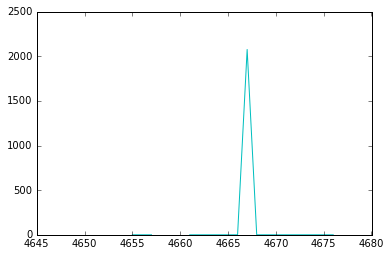

In [11]:
print ('-----------BBH-----------')
plt.plot(dpr_bbh)
plt.show()

In [4]:
def plotdpr(scan):    
    # Einlesen
    dpr = h5py.File(dpr_pfad, 'r')
    dpr_lat=np.array(dpr[scan]['Latitude'])
    dpr_lon=np.array(dpr[scan]['Longitude'])
    dpr_pp=np.array(dpr[scan]['SLV']['zFactorCorrected'])
    dpr_pp[dpr_pp<0]= np.nan

    dpr_pp_surf=np.array(dpr[scan]['SLV']['zFactorCorrectedNearSurface'])
    dpr_pp_surf[dpr_pp_surf<0]= np.nan


    dpr_bbh=np.array(dpr[scan]['CSF']['heightBB'], dtype=float)
    dpr_bbh[dpr_bbh<0]= np.nan

    dpr_bbh_flag = np.array(dpr[scan]['CSF']['flagBB'], dtype=float)
    dpr_bbh_flag[dpr_bbh_flag<0]= np.nan

    dpr_bbh_qual = np.array(dpr[scan]['CSF']['qualityBB'], dtype=float)
    dpr_bbh_qual[dpr_bbh_qual<0]= np.nan


    dpr_bbw=np.array(dpr[scan]['CSF']['widthBB'], dtype=float)
    dpr_bbw[dpr_bbw<0]= np.nan

    dpr_time = dpr['NS']['ScanTime']

    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    from pcc import boxpol_pos
    bonn_pos = boxpol_pos()
    bx, by = bonn_pos['gkx_ppi'], bonn_pos['gky_ppi']
    bonnlat, bonnlon = bonn_pos['lat_ppi'], bonn_pos['lon_ppi']
    blat, blon = bonn_pos['lat_ppi'], bonn_pos['lon_ppi']

    dpr_lon, dpr_lat = wradlib.georef.reproject(dpr_lon, dpr_lat, projection_target=proj_stereo , projection_source=proj_wgs)
    bonnlon, bonnlat = wradlib.georef.reproject(bonnlon, bonnlat, projection_target=proj_stereo , projection_source=proj_wgs)

    print '-------->', bonnlon, bonnlat


    lon0, lat0, radius = bonnlon, bonnlat, 100
    r = np.sqrt((dpr_lat - lat0)**2 + (dpr_lon - lon0)**2)
    position = r < radius

    lat = dpr_lat[position]
    lon = dpr_lon[position]

    dpr_pp[np.where(r > radius)]=np.nan
    pp=dpr_pp

    dpr_pp_surf[np.where(r > radius)]=np.nan

    dpr_bbw[np.where(r > radius)]=np.nan
    dpr_bbh[np.where(r > radius)]=np.nan


    # Zeitstempel erstellen
    l2, l1 = -190, -250
    k2, k1 = -4210, -4270
    # BoxPol
    #l2, l1 = -110, -320
    #k2, k1 = -4130, -4340
    #
    pos = np.where((dpr_lat<k2) & (dpr_lat>k1) & (dpr_lon < l2) & (dpr_lon > l1))



    h = np.arange(150,4800,150)
    if scan=='HS':
        hdpr = 1000 * (np.arange(88,0,-1)*0.250)

    else:
        hdpr = 1000 * (np.arange(176,0,-1)*0.125)

    hhh = np.array(pp.shape[0]*pp.shape[1]*list(hdpr))
    ppp = pp.reshape(pp.shape[0]*pp.shape[1]*pp.shape[2])

    maske = ~np.isnan(hhh) & ~np.isnan(ppp)



    fig = plt.figure(figsize=(14,12))
    #zzz = str(jahr)+'-'+str(monat)+'-'+str(tag)+'--'+str(stunde)+':'+str(minute)+' UTC'
    #fig.suptitle(zzz + ' UTC')

    ###################
    ax1 = fig.add_subplot(221, aspect='auto')
    #plt.subplot(2,2,1)
    plt.pcolormesh(dpr_lon, dpr_lat,np.ma.masked_invalid(dpr_pp_surf), vmin=np.nanmin(dpr_pp_surf), vmax=np.nanmax(dpr_pp_surf), cmap=get_miub_cmap())
    cbar = plt.colorbar()
    cbar.set_label('Ref. in dbz')
    plot_borders(ax1)
    plot_radar(blon, blat, ax1, reproject=True, cband=False,col='black')
    plt.plot(dpr_lon[:,0],dpr_lat[:,0], color='black',lw=1)
    plt.plot(dpr_lon[:,-1],dpr_lat[:,-1], color='black',lw=1)
    plt.plot(dpr_lon[:,dpr_lon.shape[1]/2],dpr_lat[:,dpr_lon.shape[1]/2], color='black',lw=1, ls='--')


    ax1 = plt.scatter(bonnlon, bonnlat, c=50 ,s=50, color='red')


    plt.grid()
    plt.xlim(-420,390)
    plt.ylim(-4700, -3700)

    ##################exit()
    hhh = hhh/1000.
    ax2 = fig.add_subplot(222, aspect='auto')
    ax2.hist2d(ppp[maske],hhh[maske], bins=30, cmap=get_my_cmap(), vmin=0.1)
    print pp.shape

    print ppp.shape

    #plt.plot(np.nanmax(pp[:,:],axis=0),hdpr, color='red', lw=2)
    ax2.plot(np.nanmean(pp[:,:,:],axis=(0,1)),hdpr/1000., color='red', lw=2)
    plt.plot(np.nanmedian(pp[:,:,:],axis=(0,1)),hdpr/1000., color='green', lw=2)

    cbar = plt.colorbar()
    cbar.set_label('number of samples')

    #plt.title('DPR Ref. in Box')
    plt.xlabel('Reflectivity  (dBZ)')
    plt.ylabel('Height (km)')
    plt.grid()
    plt.xticks()
    plt.yticks()

    #plt.ylim(0,6000)
    #plt.xlim(0,50)
    ##################
    #print np.uniforn(bbh)
    #mini = np.nanmin(bbh[bbh>0])

    ax3 = fig.add_subplot(223, aspect='auto')
    plt.pcolormesh(dpr_lon, dpr_lat,np.ma.masked_invalid(dpr_bbh), vmin=0.1, cmap=get_my_cmap())#np.nanmin(dpr_bbh[dpr_bbh>0])
    cbar = plt.colorbar()
    cbar.set_label('BB Hight in m')

    plot_borders(ax3)
    plot_radar(blon, blat, ax3, reproject=True, cband=False,col='black')
    plt.plot(dpr_lon[:,0],dpr_lat[:,0], color='black',lw=1)
    plt.plot(dpr_lon[:,-1],dpr_lat[:,-1], color='black',lw=1)
    plt.plot(dpr_lon[:,dpr_lon.shape[1]/2],dpr_lat[:,dpr_lon.shape[1]/2], color='black',lw=1, ls='--')

    ax1 = plt.scatter(bonnlon, bonnlat, c=50 ,s=50, color='red')
    plt.grid()
    #plt.title('BB Hight')
    plt.xlim(-420,390)
    plt.ylim(-4700, -3700)

    ##################
    ax4 = fig.add_subplot(224, aspect='auto')
    plt.pcolormesh(dpr_lon, dpr_lat,np.ma.masked_invalid(dpr_bbw), vmin=np.nanmin(dpr_bbw[dpr_bbh>0]), vmax=np.nanmax(dpr_bbw), cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label('BB Width in m')

    plot_borders(ax4)
    plot_radar(blon, blat, ax4, reproject=True, cband=False,col='black')
    plt.plot(dpr_lon[:,0],dpr_lat[:,0], color='black',lw=1)
    plt.plot(dpr_lon[:,-1],dpr_lat[:,-1], color='black',lw=1)
    plt.plot(dpr_lon[:,dpr_lon.shape[1]/2],dpr_lat[:,dpr_lon.shape[1]/2], color='black',lw=1, ls='--')

    ax1 = plt.scatter(bonnlon, bonnlat, c=50 ,s=50, color='red')
    plt.grid()
    #plt.title('BB Width')
    plt.xlim(-420,390)
    plt.ylim(-4700, -3700)

    plt.tight_layout()
    plt.show()
    #plt.savefig('/automount/ags/velibor/plot/BB/_'+scan+'dprbb_'+str(dates)+'.png' )
    #plt.close()
    return ppp[maske],hhh[maske]




--------> -216.64772430049572 -4235.233235191105


pcc.py:372: DeprecatedWarning: open_shape is deprecated as of 0.11.1 and will be removed in 1.0.0. Use :func:`open_vector` instead.
  dataset, inLayer = wradlib.io.open_shape(filename)
pcc.py:475: DeprecatedWarning: polar2polyvert is deprecated as of 0.11.3 and will be removed in 1.0.0. Use :func:`spherical_to_polyvert` instead.
  (x_loc, y_loc))
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:673: DeprecatedWarning: polar2lonlat is deprecated as of 0.11.3 and will be removed in 1.0.0.
  lon, lat = polar2lonlat(r, az, sitecoords)
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:140: DeprecatedWarning: hor2aeq is deprecated as of 0.11.3 and will be removed in 1.0.0.
  delta, tau = hor2aeq(a, h, phi)


(7932, 49, 176)
(68405568,)


/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/__main__.py:118: RuntimeWarning: Mean of empty slice
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:907: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
pcc.py:372: DeprecatedWarning: open_shape is deprecated as of 0.11.1 and will be removed in 1.0.0. Use :func:`open_vector` instead.
  dataset, inLayer = wradlib.io.open_shape(filename)
pcc.py:475: DeprecatedWarning: polar2polyvert is deprecated as of 0.11.3 and will be removed in 1.0.0. Use :func:`spherical_to_polyvert` instead.
  (x_loc, y_loc))
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:673: DeprecatedWarning: polar2lonlat is deprecated as of 0.11.3 and will be removed in 1.0.0.
  lon, lat = polar2lonlat(r, az, sitecoords)
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.

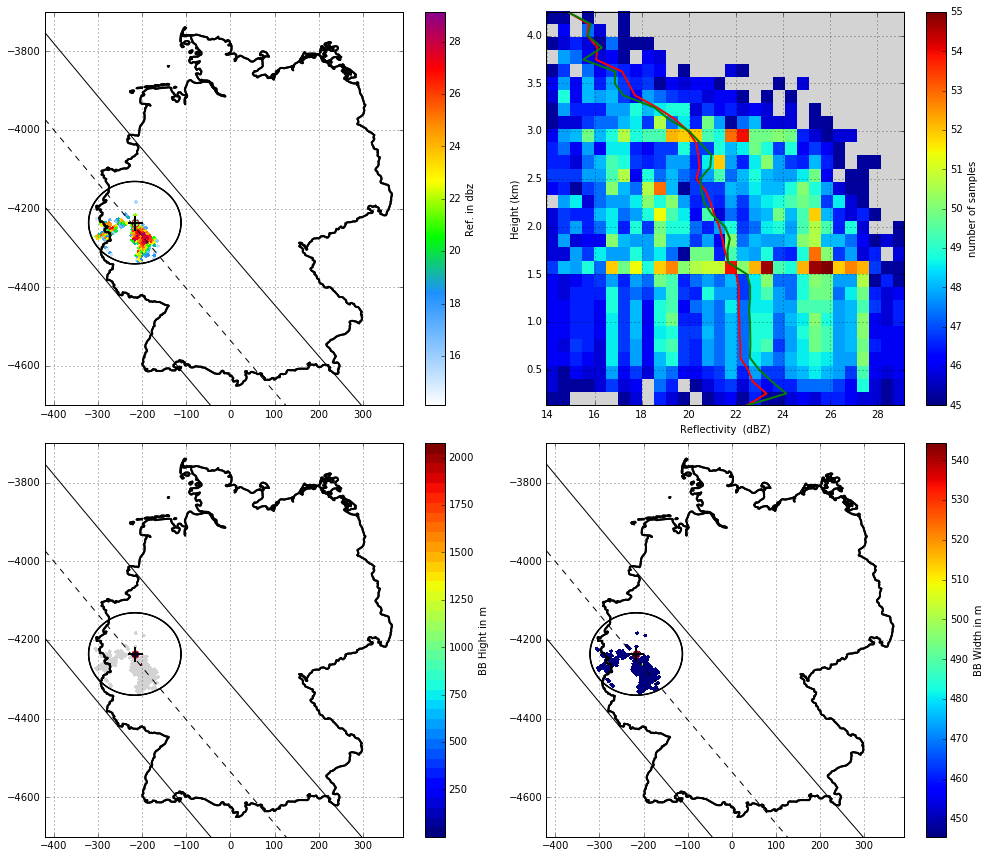

In [5]:
NSppp, NShhh = plotdpr('NS')

--------> -216.64772430049572 -4235.233235191105


pcc.py:372: DeprecatedWarning: open_shape is deprecated as of 0.11.1 and will be removed in 1.0.0. Use :func:`open_vector` instead.
  dataset, inLayer = wradlib.io.open_shape(filename)
pcc.py:475: DeprecatedWarning: polar2polyvert is deprecated as of 0.11.3 and will be removed in 1.0.0. Use :func:`spherical_to_polyvert` instead.
  (x_loc, y_loc))
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:673: DeprecatedWarning: polar2lonlat is deprecated as of 0.11.3 and will be removed in 1.0.0.
  lon, lat = polar2lonlat(r, az, sitecoords)
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:140: DeprecatedWarning: hor2aeq is deprecated as of 0.11.3 and will be removed in 1.0.0.
  delta, tau = hor2aeq(a, h, phi)


(7932, 25, 176)
(34900800,)


/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/__main__.py:118: RuntimeWarning: Mean of empty slice
pcc.py:372: DeprecatedWarning: open_shape is deprecated as of 0.11.1 and will be removed in 1.0.0. Use :func:`open_vector` instead.
  dataset, inLayer = wradlib.io.open_shape(filename)
pcc.py:475: DeprecatedWarning: polar2polyvert is deprecated as of 0.11.3 and will be removed in 1.0.0. Use :func:`spherical_to_polyvert` instead.
  (x_loc, y_loc))
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:673: DeprecatedWarning: polar2lonlat is deprecated as of 0.11.3 and will be removed in 1.0.0.
  lon, lat = polar2lonlat(r, az, sitecoords)
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/wradlib/georef/polar.py:140: DeprecatedWarning: hor2aeq is deprecated as of 0.11.3 and will be removed in 1.0.0.
  delta, tau = hor2aeq(a, h, phi)
pcc.py:372: DeprecatedWarning: open_shape is deprecated as of 0.11.1 and will be re

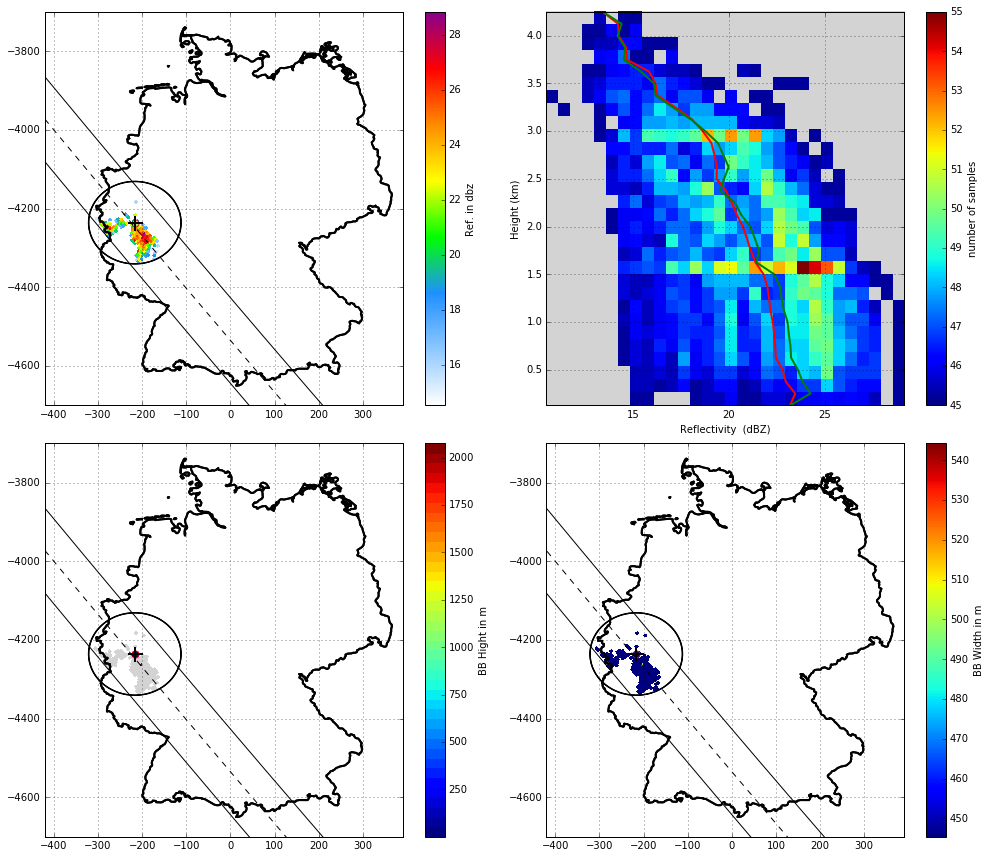

In [6]:
MSppp, MShhh = plotdpr('MS')

In [7]:
dpr_pp.shape

(7932, 49, 176)

In [8]:
dpr_pp[:,11:36,:].shape

(7932, 25, 176)

In [9]:

def zFactor(scan):
    # Einlesen
    
    dpr = h5py.File(dpr_pfad, 'r')
    if scan=='NS':
        dpr_lat=np.array(dpr[scan]['Latitude'])[:,11:36]
        dpr_lon=np.array(dpr[scan]['Longitude'])[:,11:36]
        dpr_zc=np.array(dpr[scan]['SLV']['zFactorCorrected'])[:,11:36,:]
        dpr_zm=np.array(dpr[scan]['PRE']['zFactorMeasured'])[:,11:36,:]
    
    else:
        dpr_lat=np.array(dpr[scan]['Latitude'])
        dpr_lon=np.array(dpr[scan]['Longitude'])
        dpr_zc=np.array(dpr[scan]['SLV']['zFactorCorrected'])
        dpr_zm=np.array(dpr[scan]['PRE']['zFactorMeasured'])
    
    dpr_zc[dpr_zc<0]= np.nan
    dpr_zm[dpr_zm<0]= np.nan
    
    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    from pcc import boxpol_pos
    bonn_pos = boxpol_pos()
    bx, by = bonn_pos['gkx_ppi'], bonn_pos['gky_ppi']
    bonnlat, bonnlon = bonn_pos['lat_ppi'], bonn_pos['lon_ppi']
    blat, blon = bonn_pos['lat_ppi'], bonn_pos['lon_ppi']

    dpr_lon, dpr_lat = wradlib.georef.reproject(dpr_lon, dpr_lat, 
                                                projection_target=proj_stereo, projection_source=proj_wgs)
    bonnlon, bonnlat = wradlib.georef.reproject(bonnlon, bonnlat, 
                                                projection_target=proj_stereo, projection_source=proj_wgs)
    

    lon0, lat0, radius = bonnlon, bonnlat, 100
    r = np.sqrt((dpr_lat - lat0)**2 + (dpr_lon - lon0)**2)
    position = r < radius

    lat = dpr_lat[position]
    lon = dpr_lon[position]

    dpr_zc[np.where(r > radius)]=np.nan
    zc=dpr_zc
    
    dpr_zm[np.where(r > radius)]=np.nan
    zm=dpr_zm
    
    return dpr_lat, dpr_lon, zc, zm

In [10]:
lat, lon, zc, zm = zFactor('NS')
lat, lon, mzc, mzm = zFactor('MS')

print (lat.shape, lon.shape, zc.shape, zm.shape)

((7932, 25), (7932, 25), (7932, 25, 176), (7932, 25, 176))


In [11]:

hdpr = 1000 * (np.arange(176,0,-1)*0.125)

hhhzm = np.array(zm.shape[0]*zm.shape[1]*list(hdpr))
pppzm = zm.reshape(zm.shape[0]*zm.shape[1]*zm.shape[2])

maskem = ~np.isnan(hhhzm) & ~np.isnan(pppzm)

hhhzc = np.array(zc.shape[0]*zc.shape[1]*list(hdpr))
pppzc = zc.reshape(zc.shape[0]*zc.shape[1]*zc.shape[2])

maskec = ~np.isnan(hhhzc) & ~np.isnan(pppzc)

mhhhzc = np.array(mzc.shape[0]*mzc.shape[1]*list(hdpr))
mpppzc = mzc.reshape(mzc.shape[0]*mzc.shape[1]*mzc.shape[2])

mmaskec = ~np.isnan(mhhhzc) & ~np.isnan(mpppzc)

mhhhzm = np.array(mzm.shape[0]*mzm.shape[1]*list(hdpr))
mpppzm = mzm.reshape(mzm.shape[0]*mzm.shape[1]*mzm.shape[2])

mmaskem = ~np.isnan(mhhhzm) & ~np.isnan(mpppzm)

In [12]:
# differenz CFAD
diffm= zm - mzm
diffc= zc - mzc

hhhdiffm = np.array(diffm.shape[0]*diffm.shape[1]*list(hdpr))
pppdiffm = diffm.reshape(diffm.shape[0]*diffm.shape[1]*diffm.shape[2])
mask_diffm = ~np.isnan(hhhdiffm) & ~np.isnan(pppdiffm)

hhhdiffc = np.array(diffc.shape[0]*diffc.shape[1]*list(hdpr))
pppdiffc = diffc.reshape(diffc.shape[0]*diffc.shape[1]*diffc.shape[2])
mask_diffc = ~np.isnan(hhhdiffc) & ~np.isnan(pppdiffc)



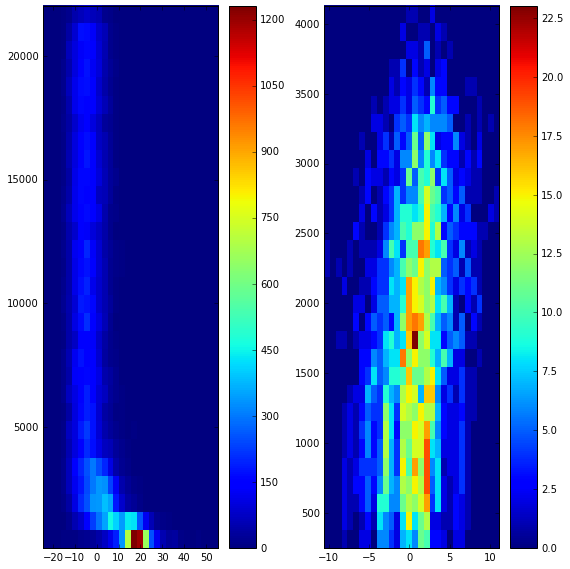

In [13]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.hist2d(pppdiffm[mask_diffm],hhhdiffm[mask_diffm], bins=30)
plt.colorbar()
plt.subplot(1,2,2)
plt.hist2d(pppdiffc[mask_diffc],hhhdiffc[mask_diffc], bins=30)
plt.colorbar()

plt.tight_layout()

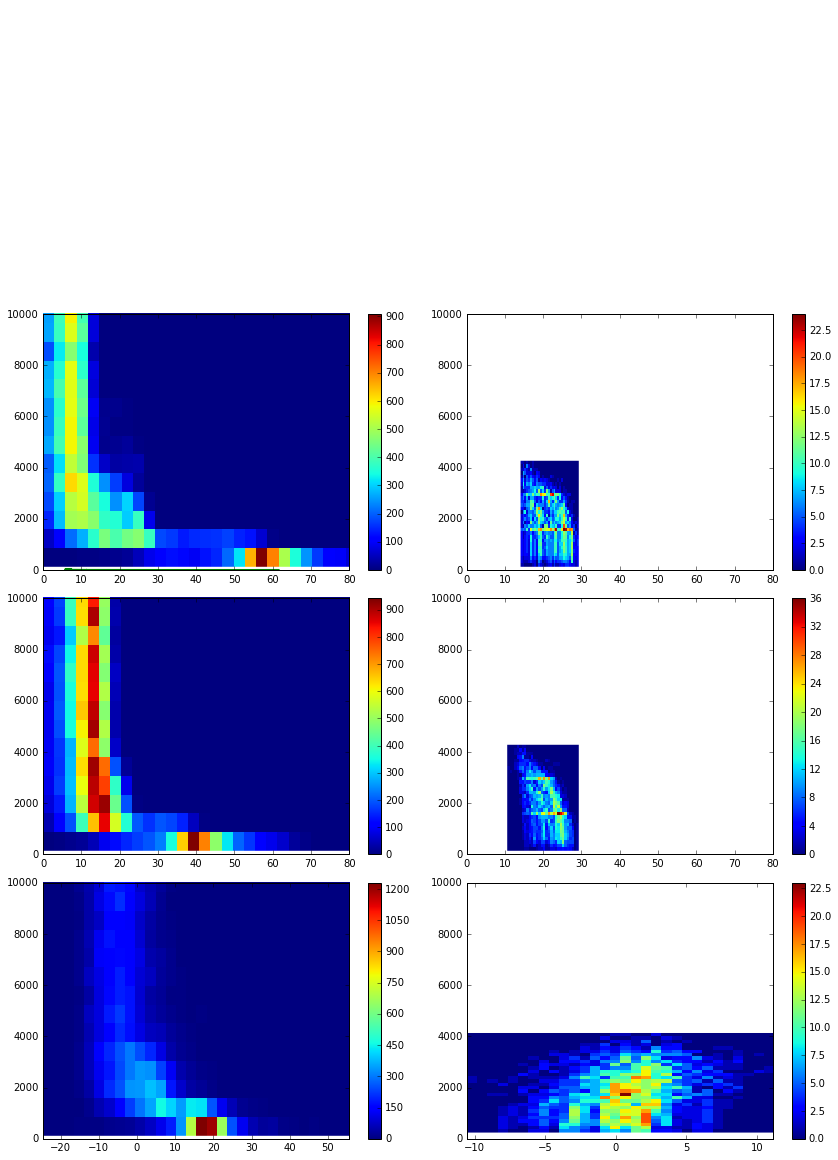

In [14]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
plt.hist2d(pppzm[maskem],hhhzm[maskem], bins=30)
plt.plot(np.nanmedian(zm[:,:,:],axis=(0,1)),hdpr/1000., color='green', lw=2)
plt.xlim(0,80)
plt.ylim(0,10000)

plt.colorbar()

plt.subplot(3,2,2)
plt.hist2d(pppzc[maskec],hhhzc[maskec], bins=30)
plt.xlim(0,80)
plt.colorbar()
plt.ylim(0,10000)


plt.subplot(3,2,3)
plt.hist2d(mpppzm[mmaskem],mhhhzm[mmaskem], bins=30)
plt.xlim(0,80)
plt.colorbar()
plt.ylim(0,10000)


plt.subplot(3,2,4)
plt.hist2d(mpppzc[mmaskec],mhhhzc[mmaskec], bins=30)
plt.xlim(0,80)
plt.colorbar()
plt.ylim(0,10000)




plt.subplot(3,2,5)
plt.hist2d(pppdiffm[mask_diffm],hhhdiffm[mask_diffm], bins=30)
plt.colorbar()
plt.ylim(0,10000)

plt.subplot(3,2,6)
plt.hist2d(pppdiffc[mask_diffc],hhhdiffc[mask_diffc], bins=30)
plt.colorbar()
plt.ylim(0,10000)


plt.tight_layout()


In [15]:
pppzm.shape


(34900800,)